# Inf, Eq, Conv

In [ ]:
def inf(cle1,cle2):
    if((isinstance(cle1,list))):
        clef1 = cle1.copy()
        clef2 = cle2.copy()
        if ( (len(cle1) == 0) and (len(cle2) == 0)):
            return False
        c1 =  clef1.pop(0)
        c2 =  clef2.pop(0)
        if c1>c2:
            return False
        if c1<c2:
            return True
        if c1 == c2:
            return inf(clef1,clef2)
    else:
        return cle1<cle2

def eg(cle1,cle2):
    if(isinstance(cle1,list)):
        clef1 = cle1.copy()
        clef2 = cle2.copy()
        if ( (len(clef1) == 0) and (len(clef2) == 0)):
            return True
        c1 =  clef1.pop(0)
        c2 =  clef2.pop(0)
        if c1 == c2:
            return eg(clef1,clef2)
        else:
            return False
    else:
        return cle1 == cle2
    
def conv():
    l = [] #liste des clés convertis
    with open("cles_alea/jeu_1_nb_cles_50000.txt","r") as f:
        for line in f.readlines():
            tmp = [] #liste temporaire
            ch = line.strip()[2:]
            str1 = ch[0:8]
            tmp.append(int(str1,16))
            str2 = ch[8:16]
            tmp.append(int(str2,16))
            str3 = ch[16:24]
            tmp.append(int(str3,16))
            str4 = ch[24:32]
            tmp.append(int(str4,16))
            l.append(tmp)
    return l

def convP(num_jeu,nb_cles):
    l = [] #liste des clés convertis
    with open("cles_alea/jeu_" + str(num_jeu) + "_nb_cles_"+ str(nb_cles) +".txt","r") as f:
        for line in f.readlines():
            tmp = [] #liste temporaire
            ch = line.strip()[2:]
            str1 = ch[0:8]
            tmp.append(int(str1,16))
            str2 = ch[8:16]
            tmp.append(int(str2,16))
            str3 = ch[16:24]
            tmp.append(int(str3,16))
            str4 = ch[24:32]
            tmp.append(int(str4,16))
            l.append(tmp)
    return l

# Tournois Binomiaux

In [2]:
import graphviz as gv
import math as m
import os as file

class TournoiBinomial:
    def __init__(self,k):
        self.fils = FileBinomial() # FileBinomial comporant k fils
        self.cle = k # clé de TournoiBinomial
        self.degre = 0 # degré de TournoiBinomial

    def EstVide(T):
        if (T is None):
            return True
        else:
            return False
        
    def Degre(T):
        return T.degre
    
    def Union2Tid (T1,T2):
        # TournoiB ∗ TournoiB −> TournoiB Renvoie l’union de 2 tournois de meme taille
        if(inf(T1.cle,T2.cle)):
            T1.fils.arbres.append(T2)
            T1.degre = T1.degre + 1
            return T1
        else:
            T2.fils.arbres.append(T1)
            T2.degre = T2.degre + 1
            return T2
        
    def Decapite(T):
        # TournoiB −> FileB Renvoie la file binomiale obtenue en supprimant la racine du tournoi 
        # T_k −> <T_{k−1},T_{k−2}, ... ,T_1,T_0 >
        F = FileBinomial()
        for a in T.fils.arbres:
            F.arbres.append(a)
        return F
    
    def File(T):
        # TournoiB −> FileB Renvoie la file binomiale reduite au tournoi
        # T_k −> <T_k >
        F = FileBinomial()
        F.arbres.append(T)
        return F
    
    def to_graph(self, G, prefixe):
        if not self.fils.arbres:
            G.node(prefixe,str(self.cle),shape='circle')
        else:
            G.node(prefixe,str(self.cle),shape='circle')
            for T in self.fils.arbres:
                T.to_graph(G, prefixe+"f")
                G.edge(prefixe, prefixe+"f")
        return G
    
        
    # Permet d'afficher l'arbre
    def plot(self):
        G = gv.Graph(strict=True, format='png')
        return self.to_graph(G,str(self.cle))

# Files Binomiales

In [3]:
class FileBinomial:
    def __init__(self):
        self.arbres = [] # Liste de tournoi binomial
        
    def EstVide(F):
        if F is None:
            return True
        elif not F.arbres:
            return True
        else:
            return False
        
    def MinDeg(F):
        # FileB −> TournoiB Renvoie le tournoi de degre minimal dans la file
        T = TournoiBinomial([0,0,0,0])
        for a in F.arbres:
            if(eg(T.cle,[0,0,0,0])):
                T = a
            else:
                if(TournoiBinomial.Degre(a) < TournoiBinomial.Degre(T)):
                    T = a
        return T
    
    def Reste(F):
        # FileB −> FileB Renvoie la file privee de son tournoi de degre minimal
        T = FileBinomial.MinDeg(F)
        if(T in F.arbres):
            F.arbres.remove(T)
        return F
    
    def AjoutMin(T, F):
        # Hypothese : le tournoi est de degre inferieur au MinDeg de la file
        # Tournoi ∗ FileB −> FileB
        # Renvoie la file obtenue en ajoutant le tournoi comme tournoi de degre minimal de la file initiale
        F.arbres.append(T)
        return F
    
    def UnionFile (F1 , F2):
        # FileB ∗ FileB −> FileB, Renvoie la file binomiale union des deux files F1 et F2
        return FileBinomial.UFret(F1 , F2 , None)
    
    def UFret(F1 , F2 , T):
        # FileB ∗ FileB ∗ TournoiB−> FileB, Renvoie la file binomiale union de deux files et d’un tournoi
        if TournoiBinomial.EstVide(T): # pas de tournoi en retenue
            if FileBinomial.EstVide(F1):
                return F2
            if FileBinomial.EstVide(F2):
                return F1
            T1 = FileBinomial.MinDeg(F1)
            T2 = FileBinomial.MinDeg(F2)
            if TournoiBinomial.Degre(T1) < TournoiBinomial.Degre(T2):
                return FileBinomial.AjoutMin(T1 , FileBinomial.UnionFile (FileBinomial.Reste(F1), F2))
            if TournoiBinomial.Degre(T2) < TournoiBinomial.Degre(T1):
                return FileBinomial.AjoutMin(T2 , FileBinomial.UnionFile (FileBinomial.Reste(F2), F1))
            if TournoiBinomial.Degre(T1) == TournoiBinomial.Degre(T2):
                return FileBinomial.UFret(FileBinomial.Reste(F1), FileBinomial.Reste(F2), TournoiBinomial.Union2Tid (T1 ,T2))
        else: # T tournoi en retenue
            if FileBinomial.EstVide(F1):
                return FileBinomial.UnionFile (TournoiBinomial.File(T), F2)
            if FileBinomial.EstVide(F2):
                return FileBinomial.UnionFile (TournoiBinomial.File(T), F1)
            T1 = FileBinomial.MinDeg(F1)
            T2 = FileBinomial.MinDeg(F2)
            if TournoiBinomial.Degre(T) < TournoiBinomial.Degre(T1) and TournoiBinomial.Degre(T) < TournoiBinomial.Degre(T2):
                return FileBinomial.AjoutMin(T, FileBinomial.UnionFile (F1 , F2))
            if TournoiBinomial.Degre(T) == TournoiBinomial.Degre(T1) and TournoiBinomial.Degre(T) == TournoiBinomial.Degre(T2):
                return FileBinomial.AjoutMin(T, FileBinomial.UFret(FileBinomial.Reste(F1), FileBinomial.Reste(F2), TournoiBinomial.Union2Tid (T1 , T2)))
            if TournoiBinomial.Degre(T) == TournoiBinomial.Degre(T1) and TournoiBinomial.Degre(T) < TournoiBinomial.Degre(T2):
                return FileBinomial.UFret(FileBinomial.Reste(F1), F2 , TournoiBinomial.Union2Tid (T1 , T))
            if TournoiBinomial.Degre(T) == TournoiBinomial.Degre(T2) and TournoiBinomial.Degre(T) < TournoiBinomial.Degre(T1):
                return FileBinomial.UFret(FileBinomial.Reste(F2), F1 , TournoiBinomial.Union2Tid (T2 , T))
            
    def Ajout(cle, F):
        # cle -> FileB, Renvoi la file binomiale union de deux files
        T = TournoiBinomial(cle)
        FT = TournoiBinomial.File(T)
        return FileBinomial.UnionFile(FT,F)
    
    def ConsIter(L):
        # Liste -> FileB, Renvoi la file binomiale en la construisant à partir d'une file
        F = FileBinomial()
        for cle in L:
            F = FileBinomial.Ajout(cle,F)
        return F
    
    def minT(F):
        # FileB -> TournoiB, Renvoi le tournois binomial avec la plus petite racine 
        T = None
        for a in F.arbres:
            if(T is None):
                T = a
            else:
                if(inf(a.cle,T.cle)):
                    T = a
        return T
    
    def SuppMin(F):
        # FileB −> FileB, Renvoi la file binomiale en supprimant la file avec la plus petite racine
        T = FileBinomial.minT(F)
        F.arbres.remove(FileBinomial.minT(F))
        FT = TournoiBinomial.Decapite(T)
        return FileBinomial.UnionFile(FT,F)

# Test Union en O( log (n + m) )

In [ ]:
B0_1 = TournoiBinomial([5,6,7,8]) 
B0_2 = TournoiBinomial([1,2,3,4])
B0_3 = TournoiBinomial([9,10,11,12])
B0_4 = TournoiBinomial([13,14,15,16])
B1_1 = TournoiBinomial.Union2Tid(B0_1,B0_2)

print("Test sans retenue :")
F1 = TournoiBinomial.File(B0_4)
F2 = TournoiBinomial.File(B1_1)
F3 = FileBinomial.UnionFile(F1, F2)
for a in F3.arbres:
    print("LVL0 : " + str(a.cle))
    for sa in a.fils.arbres:
        print("LVL1 : " + str(sa.cle))

print("Test retenue :")
F4 = TournoiBinomial.File(B0_3)
F5 = FileBinomial.UnionFile(F3, F4)
for a in F5.arbres:
    print("LVL0 : " + str(a.cle))
    for ssa in a.fils.arbres:
        print("LVL1 : " + str(ssa.cle))
        for sssa in ssa.fils.arbres:
            print("LVL2 : " + str(sssa.cle))

# Test Ajout en O( log n )

In [ ]:
B0_1 = TournoiBinomial([1,2,3,4])
B0_2 = TournoiBinomial([5,6,7,8])
B0_3 = TournoiBinomial([9,10,11,12])
B1_1 = TournoiBinomial.Union2Tid(B0_1,B0_2)

F1 = TournoiBinomial.File(B0_3)
F2 = TournoiBinomial.File(B1_1)
F3 = FileBinomial.UnionFile(F1,F2)

for a in F3.arbres:
    print("LVL0 : " + str(a.cle))
    for ssa in a.fils.arbres:
        print("LVL1 : " + str(ssa.cle))
        for sssa in ssa.fils.arbres:
            print("LVL2 : " + str(sssa.cle))
            
print("\nTest après ajout : \n")

F3 = FileBinomial.Ajout([13,14,15,16],F3)
for a in F3.arbres:
    print("LVL0 : " + str(a.cle))
    for ssa in a.fils.arbres:
        print("LVL1 : " + str(ssa.cle))
        for sssa in ssa.fils.arbres:
            print("LVL2 : " + str(sssa.cle))

# Test ConsIter en O( n )

In [ ]:
L = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
F = FileBinomial.ConsIter(L)
for T in F.arbres:
    print("LVL0 : " + str(T.cle))
    for ST in T.fils.arbres:
        print(str(T.cle) + " LVL1 : " + str(ST.cle))
        for SST in ST.fils.arbres:
            print(str(ST.cle) + " LVL2 : " + str(SST.cle))

# Test SuppMin en O( log n )

In [ ]:
L = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
F = FileBinomial.ConsIter(L)
for T in F.arbres:
    print("LVL0 : " + str(T.cle))
    for ST in T.fils.arbres:
        print("LVL1 : " + str(ST.cle))
        for SST in ST.fils.arbres:
            print("LVL2 : " + str(SST.cle))

print("\nTest après suppression du minimum : \n")

F = FileBinomial.SuppMin(F)
for T in F.arbres:
    print("LVL0 : " + str(T.cle))
    for ST in T.fils.arbres:
        print("LVL1 : " + str(ST.cle))
        for SST in ST.fils.arbres:
            print("LVL2 : " + str(SST.cle))

# Jeu de test - Complexité temporelle Union

In [ ]:
import time
import matplotlib.pyplot as plt

# Abscisses
x = [100,200,500,1000,5000,10000,20000,50000]
# Ordonnées
y = []

for i in x:
    # Chargement du jeu de donnée
    L = convP(1,i)
    F1 = FileBinomial.ConsIter(L)
    L = convP(2,i)
    F2 = FileBinomial.ConsIter(L)

    # Temps d'éxecution de Union
    start_time = time.perf_counter()
    FileBinomial.UnionFile(F1, F2)
    y.append(time.perf_counter() - start_time)
    print("--- Pour " + str(i) + " clés %s secondes ---" % (time.perf_counter() - start_time))

#Graphique
plt.plot(x, y)
plt.show()

print("Conclusion : Union a une complexité logarithmique (Graphique non à l'échelle).")

# Jeu de test - Complexité temporelle Ajout

In [ ]:
import time
import matplotlib.pyplot as plt

# Abscisses
x = [100,200,500,1000,5000,10000,20000,50000]

# Ordonnées
y = []

for i in x:
    # Chargement du jeu de donnée
    L = convP(1,i)
    # Temps d'éxecution de Ajout
    F = FileBinomial.ConsIter(L)
    start_time = time.perf_counter()
    FileBinomial.Ajout([2997685176,10000000,1642171234,1000000000],F)
    y.append(time.perf_counter() - start_time)
    print("--- Pour " + str(i) + " clés %s secondes ---" % (time.perf_counter() - start_time))

#Graphique
plt.plot(x, y)
plt.show()

print("Conclusion : Ajout a une complexité logarithmique.")

# Jeu de test - Complexité temporelle ConsIter

In [ ]:
import time
import matplotlib.pyplot as plt

# Abscisses
x = [100,200,500,1000,5000,10000,20000,50000,100000]

# Ordonnées
y = []

for i in x:
    # Chargement du jeu de donnée
    L = convP(1,i)
    # Temps d'éxecution de ConsIter
    start_time = time.perf_counter()
    FileBinomial.ConsIter(L)
    y.append(time.perf_counter() - start_time)
    print("--- Pour " + str(i) + " clés %s secondes ---" % (time.perf_counter() - start_time))

#Graphique
plt.plot(x, y)
plt.show()

print("Conclusion : ConsIter a une complexité linéaire.")

# Jeu de test - Complexité temporelle SupprMin

--- Pour 100 clés 0.0003453430000206481 secondes ---
--- Pour 200 clés 0.0003882100000112132 secondes ---
--- Pour 500 clés 0.0006888759999981175 secondes ---
--- Pour 1000 clés 0.0008470580000050631 secondes ---
--- Pour 5000 clés 0.0023153710000087813 secondes ---
--- Pour 10000 clés 0.009143149999999878 secondes ---
--- Pour 20000 clés 0.011154232000023967 secondes ---
--- Pour 50000 clés 0.0005765790000111792 secondes ---


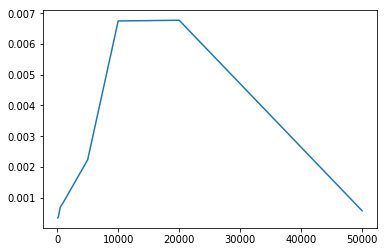

Conclusion : SuppMin a une complexité logarithmique.


In [5]:
import time
import matplotlib.pyplot as plt

# Abscisses
x = [100,200,500,1000,5000,10000,20000,50000]

# Ordonnées
y = []

for i in x:
    # Chargement du jeu de donnée
    L = convP(1,i)
    # Temps d'éxecution de SuppMin
    F = FileBinomial.ConsIter(L)
    start_time = time.perf_counter()
    FileBinomial.SuppMin(F)
    y.append(time.perf_counter() - start_time)
    print("--- Pour " + str(i) + " clés %s secondes ---" % (time.perf_counter() - start_time))

#Graphique
plt.plot(x, y)
plt.show()

print("Conclusion : SuppMin a une complexité logarithmique.")

# Test Affichage de la File

In [ ]:
# Affichage de la file binomiale F
print("Exemple avec 5 clés : ")
L = convP(1,5)
F = FileBinomial.ConsIter(L)
for T in F.arbres:
    print("Degre : " + str(T.degre))
    print("LVL0 : " + str(T.cle))
    for ST in T.fils.arbres:
        print(" LVL1 : " + str(ST.cle))
        for SST in ST.fils.arbres:
            print(" LVL2 : " + str(SST.cle))
            for SSST in SST.fils.arbres:
                print(" LVL3 : " + str(SSST.cle))

# Test Graphique

In [ ]:
# B0_1 = TournoiBinomial(1)
# B0_2 = TournoiBinomial(3)
# B0_3 = TournoiBinomial(7)
# B0_4 = TournoiBinomial(9)
# B1_1 = TournoiBinomial.Union2Tid(B0_1,B0_2) 
# B1_2 = TournoiBinomial.Union2Tid(B0_3,B0_4)
# B2_1 = TournoiBinomial.Union2Tid(B1_1,B1_2)

# B0_5 = TournoiBinomial(2)
# B0_6 = TournoiBinomial(4)
# B0_7 = TournoiBinomial(6)
# B0_8 = TournoiBinomial(8)
# B1_3 = TournoiBinomial.Union2Tid(B0_5,B0_6)
# B1_4 = TournoiBinomial.Union2Tid(B0_7,B0_8)
# B2_2 = TournoiBinomial.Union2Tid(B1_3,B1_4)

# B3_1 = TournoiBinomial.Union2Tid(B2_1,B2_2)

# B3_1.plot()